In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import matplotlib.pyplot as plt
import sklearn.pipeline as pl
from sklearn import ensemble
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
def xlsx_to_csv_pd():
    data_xls = pd.read_excel('odesolverdata_test.xlsx', index_col=0)
    data_xls.to_csv('odesolverdata_test.csv', encoding='utf-8')

if __name__ == '__main__':
    xlsx_to_csv_pd()

In [3]:
df=pd.read_csv('odesolverdata_test.csv')

In [4]:
def process(data):
    return float(data)
def strip_data(data):
    return data.strip("[").strip("]").split(",")
def float_data(data):
    return list(map(process,strip_data(data)))

In [5]:
list_k=list(map(float_data,list(df['k'])))
list_solver=list(df['solver'])
list_nonstiffness=list(df['nonstiffness'])
#list_abstols=list(map(float_data,list(df['abstols'])))
list_reltols=list(map(float_data,list(df['reltols'])))
list_times=list(map(float_data,list(df['times'])))
list_errors=list(map(float_data,list(df['errors'])))

In [6]:
def split_solver(data):
    data_1=data.strip("()").strip(")")
    return data_1.split("(")
# split_solver("AutoTsit5(KenCarp3())")
# ['AutoTsit5', 'KenCarp3']

In [7]:
SOLVER=[]
for i in range(len(list_solver)):
    SOLVER.append(split_solver(list_solver[i]))
# SOLVER[1][0]
# 'AutoTsit5'

In [8]:
from sklearn import preprocessing
solver_1=['AutoTsit5','AutoDP5','AutoVern6','AutoVern7','AutoVern8','AutoVern9']
solver_2=['KenCarp3','KenCarp4','KenCarp5','Trapezoid','Rosenbrock23','Rodas3','Rodas4','Rodas5']

In [9]:
encoder_solver = preprocessing.OneHotEncoder()
encoder_solver.fit([
    [0, 0], 
    [1, 1], 
    [2, 2], 
    [3, 3],
    [4, 4],
    [5, 5],
    [0, 6],
    [1, 7]
])   
enc=[]
for i in range(len(SOLVER)):
    for j in range(len(list_times[0])):
        enc.append([solver_1.index(SOLVER[i][0]),solver_2.index(SOLVER[i][1])])
    
encoded_solver_vector=encoder_solver.transform(enc).toarray()

In [10]:
k_1=[]
k_2=[]
k_3=[]
abstols=[]
reltols=[]
times=[]
errors=[]
for i in range(len(list_k)):
    for j in range(len(list_times[0])):
        k_1.append(list_k[i][0])
        k_2.append(list_k[i][1])
        k_3.append(list_k[i][2])
        #abstols.append(list_abstols[i][j])
        reltols.append(list_reltols[i][j])
        times.append(list_times[i][j])
        errors.append(list_errors[i][j])

In [11]:
E_T=[]
for i in range(len(times)):
    E_T0=errors[i]/times[i]
    E_T.append(E_T0)

In [12]:
k_1=np.array(k_1)
k_2=np.array(k_2)
k_3=np.array(k_3)
# abstols=np.array(abstols)
reltols=np.array(reltols)
times=np.array(times)
errors=np.array(errors)
E_T=np.array(E_T)

In [13]:
nonstiffness=[]
for i in range(len(list_nonstiffness)):
    for j in range(len(list_times[0])):
        nonstiffness.append(list_nonstiffness[i])
nonstiffness=np.array(nonstiffness)
D=np.c_[k_1,k_2,k_3,encoded_solver_vector,nonstiffness,reltols,times,errors]

In [14]:
#X=np.c_[k_1,k_2,k_3,encoded_solver_vector,nonstiffness,reltols]
X_eff=np.c_[k_1,k_2,k_3,encoded_solver_vector,nonstiffness,reltols]

In [15]:
y_eff=E_T
#y=np.c_[times,errors]
y_e = errors
y_t = times

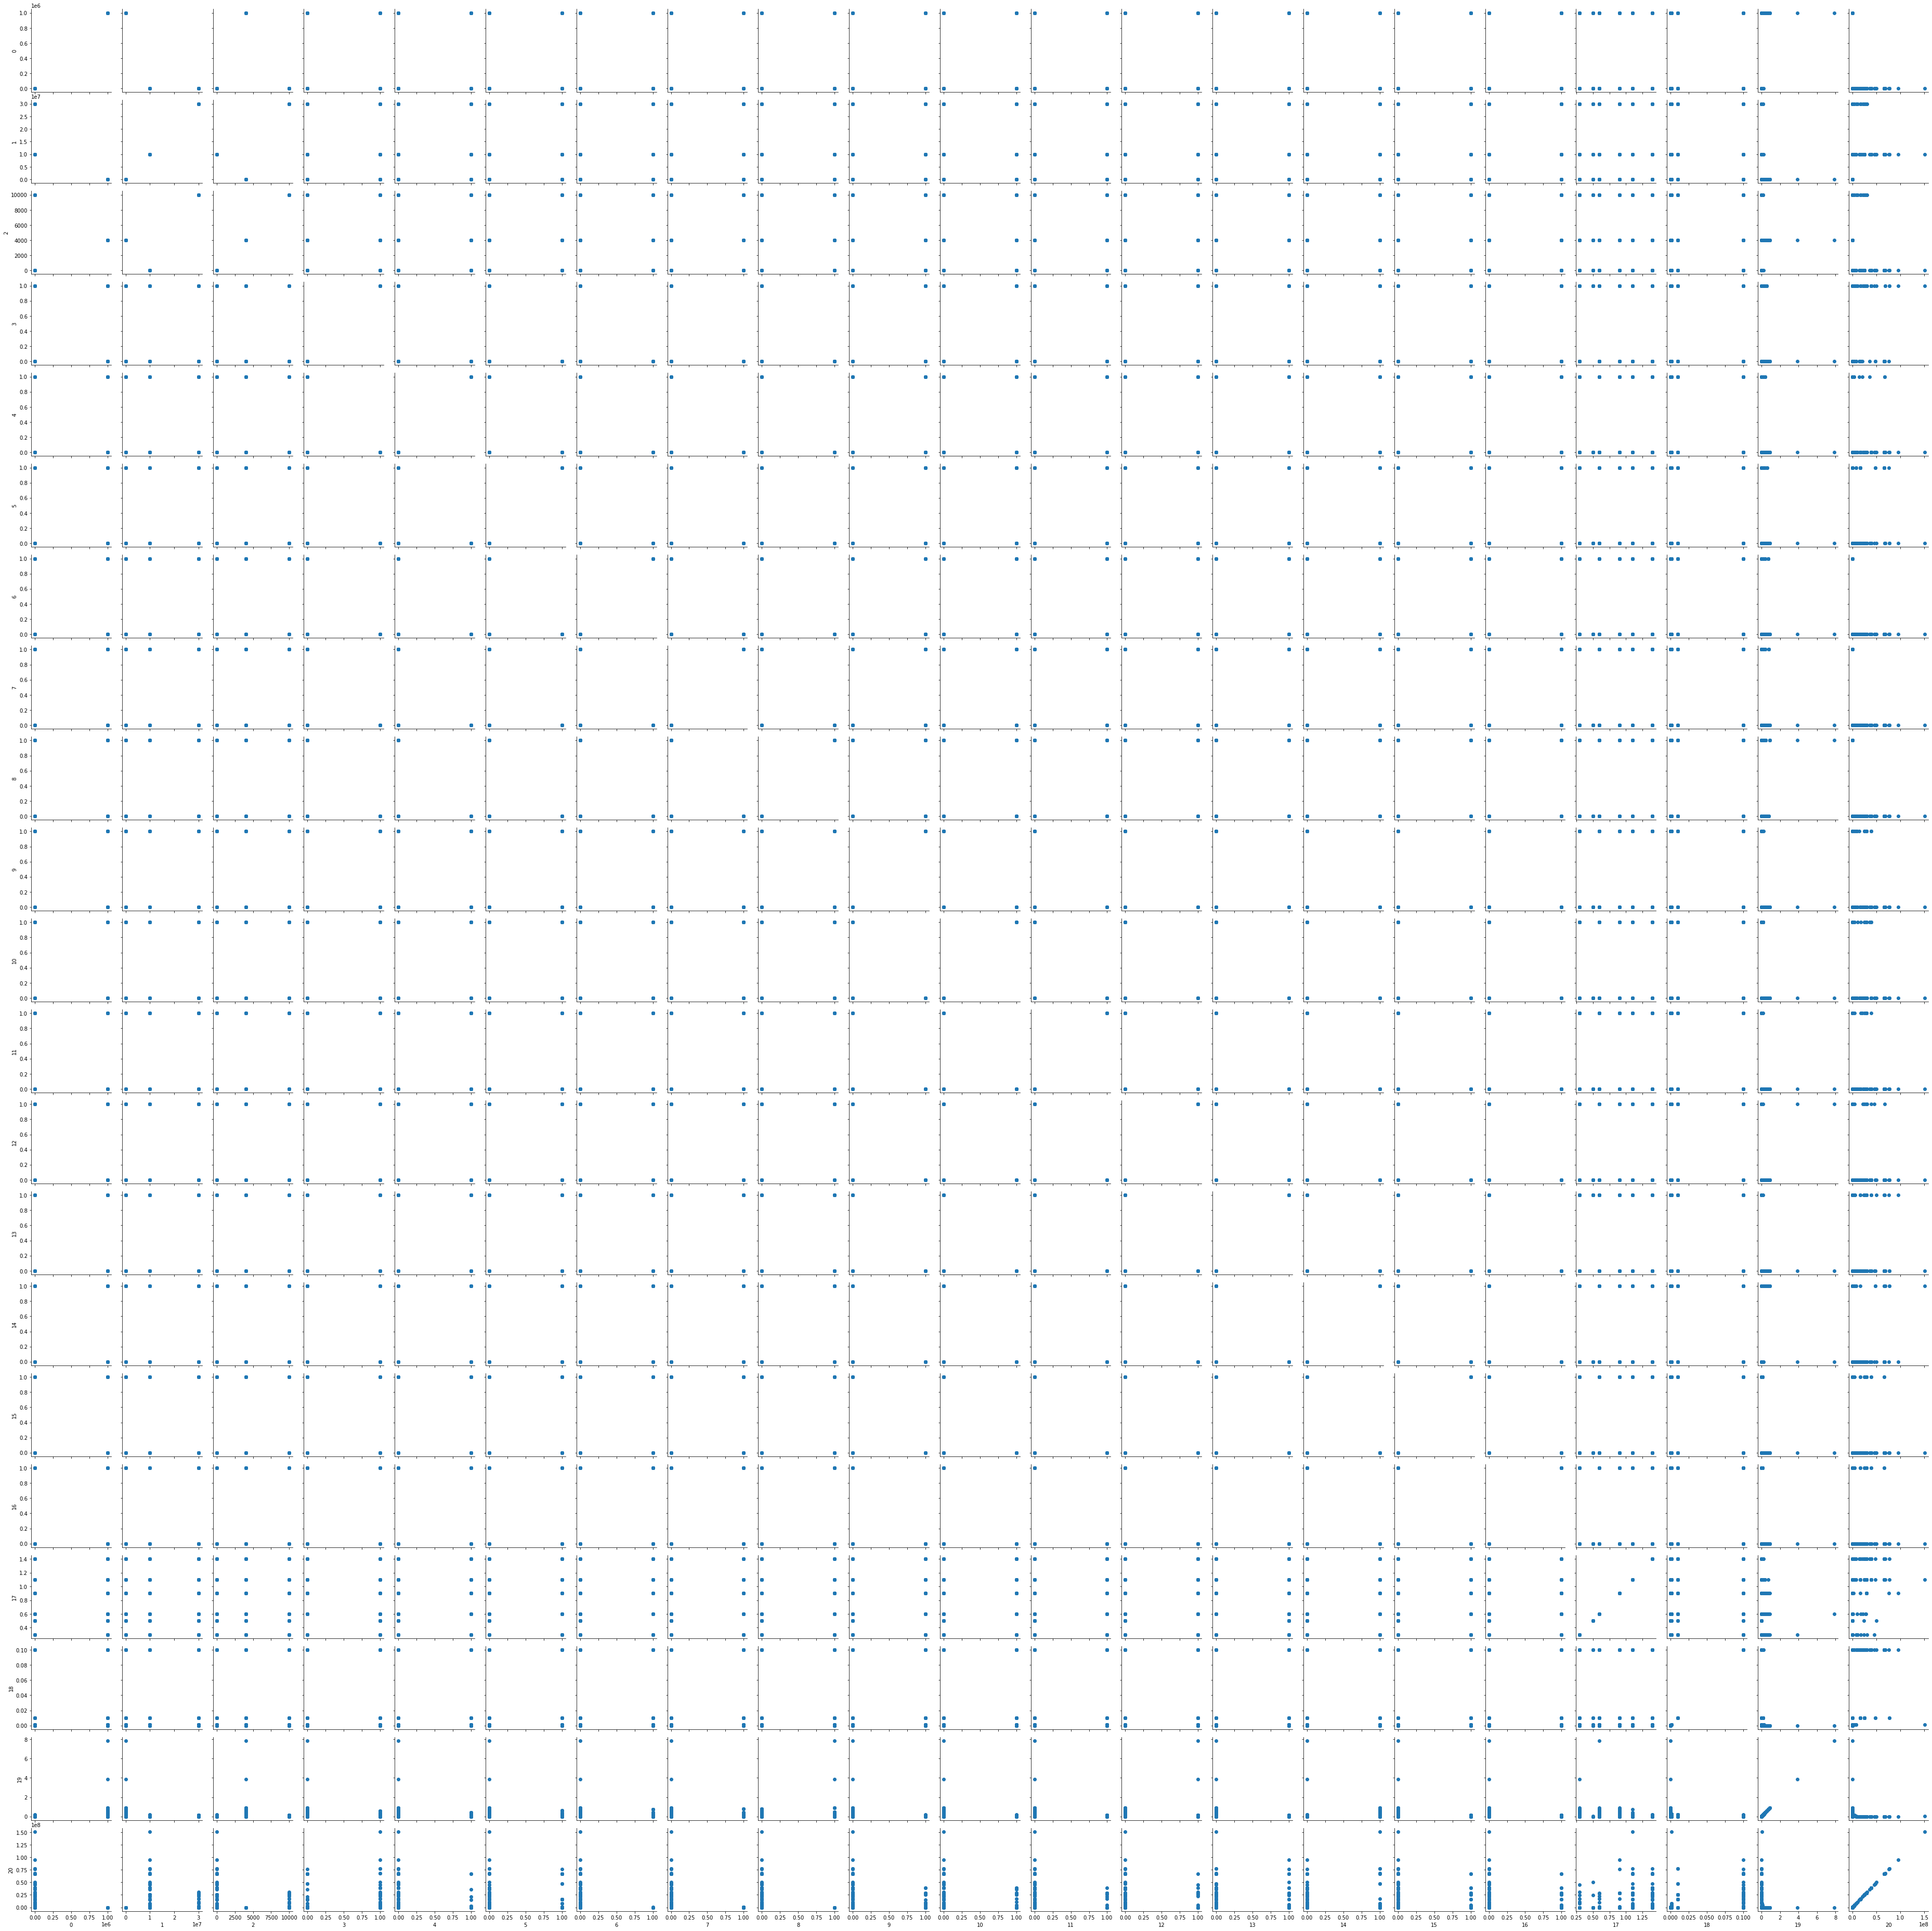

In [16]:
data=pd.DataFrame(D)
g = sns.PairGrid(data)
g.map(plt.scatter)
plt.show()

In [17]:
X_eff = X_eff[errors < 1e-4]

y_e = y_e[errors<1e-4]
y_t = y_t[errors<1e-4]

In [18]:
# Split the data into training/testing sets
X_eff_train, X_eff_test, y_e_train, y_e_test = train_test_split(X_eff,y_e,test_size=0.2,random_state=10)
X_eff_train, X_eff_test, y_t_train, y_t_test = train_test_split(X_eff,y_t,test_size=0.2,random_state=10)

Coefficients: 
 [-4.24312284e-12 -5.38368538e-15 -3.84521518e-14  1.00509747e-06
  2.60946722e-06 -1.25656332e-07  2.48329998e-07 -1.95973814e-06
 -1.77750022e-06  7.20065010e-07 -1.42311496e-06 -2.29325110e-07
  1.06518648e-05  7.96447036e-07 -2.43185096e-06 -3.84148768e-06
 -4.24259819e-06 -6.42056621e-06  1.69556582e-04]
Mean squared error: 0.00
training score: 0.24
testing score: 0.24


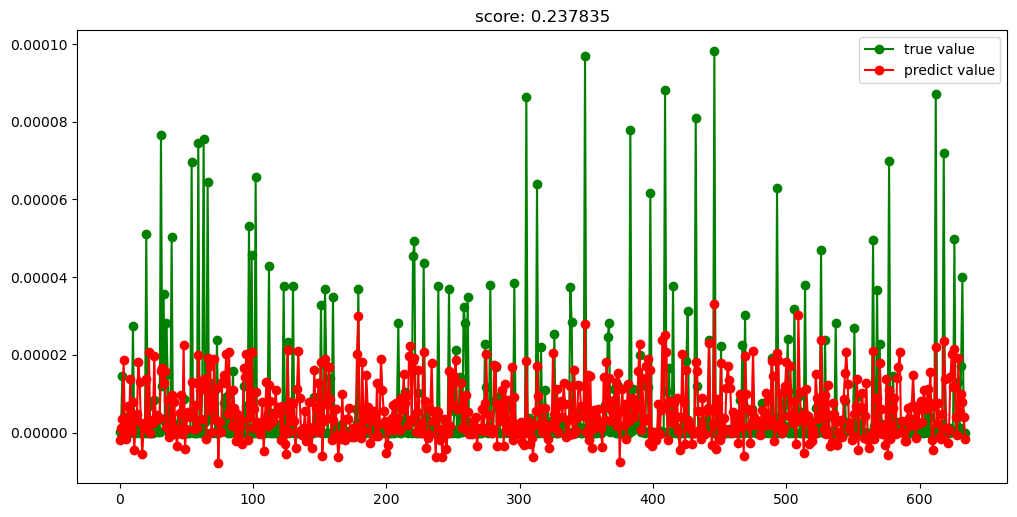

Coefficients: 
 [ 3.53815137e-08  2.99597896e-10  3.19690468e-10 -1.01352276e-02
 -1.06606750e-02 -4.41002795e-03 -7.23084910e-03  1.47207565e-02
  1.77160232e-02 -1.19553449e-02 -1.05048910e-02 -1.18085616e-02
 -8.69676956e-03 -6.92899325e-03  6.63090076e-02 -8.31161035e-03
 -8.10283707e-03  8.26840365e-02 -1.58274797e-01]
Mean squared error: 0.00
training score: 0.32
testing score: 0.30


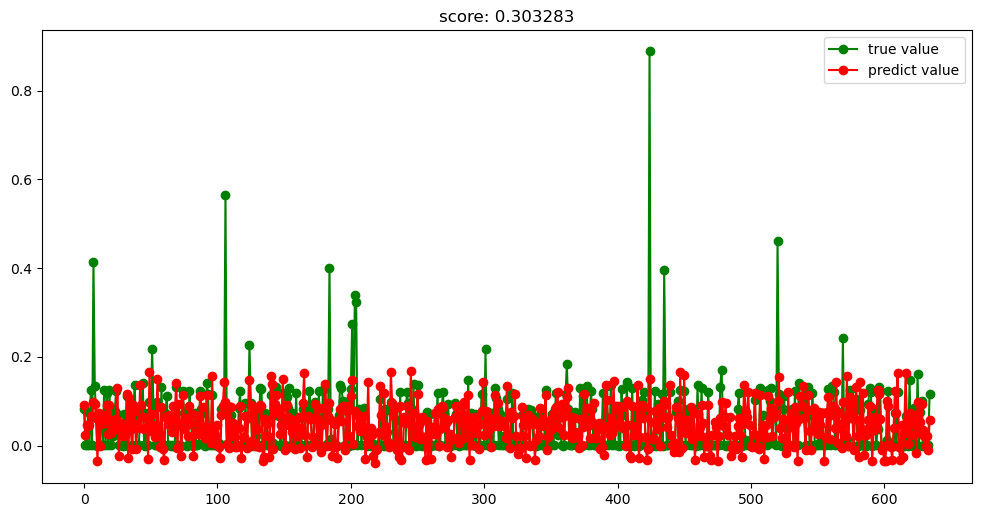

In [19]:
# Create linear regression object
lr_e = linear_model.LinearRegression()
lr_t = linear_model.LinearRegression()
# Train the model using the training sets
lr_e.fit(X_eff_train, y_e_train)
lr_t.fit(X_eff_train, y_t_train)
# Make predictions using the testing set
y_e_lr_pred = lr_e.predict(X_eff_test)
y_t_lr_pred = lr_t.predict(X_eff_test)

# The coefficients
print('Coefficients: \n', lr_e.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_e_test, y_e_lr_pred))
# The coefficient of determination: 1 is perfect prediction
print('training score: %.2f'
      % lr_e.score(X_eff_train,y_e_train))
print('testing score: %.2f'
      % r2_score(y_e_test, y_e_lr_pred))

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(np.arange(len(y_e_test)), y_e_test,'go-',label='true value')
plt.plot(np.arange(len(y_e_test)),y_e_lr_pred,'ro-',label='predict value')
plt.title('score: %f'%r2_score(y_e_test, y_e_lr_pred))
plt.legend()
plt.savefig('linear_errors.pdf')
plt.show()

# The coefficients
print('Coefficients: \n', lr_t.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_t_test, y_t_lr_pred))
# The coefficient of determination: 1 is perfect prediction
print('training score: %.2f'
      % lr_t.score(X_eff_train,y_t_train))
print('testing score: %.2f'
      % r2_score(y_t_test, y_t_lr_pred))

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(np.arange(len(y_t_test)), y_t_test,'go-',label='true value')
plt.plot(np.arange(len(y_t_test)),y_t_lr_pred,'ro-',label='predict value')
plt.title('score: %f'%r2_score(y_t_test, y_t_lr_pred))
plt.legend()
plt.savefig('linear_times.pdf')
plt.show()

In [20]:
def plot_learning_curves(model, X_train, X_test, y_train, y_test):

    train_errors, test_errors = [], []
    for i in range(1, len(X_train)):
        model.fit(X_train[:i], y_train[:i])
        y_train_predict = model.predict(X_train[:i])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:i],y_train_predict))
        test_errors.append(mean_squared_error(y_test,y_test_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training set")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=2, label="testing set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.show()

Mean squared error: 0.00
training score: -25907290.66
testing score: 0.25


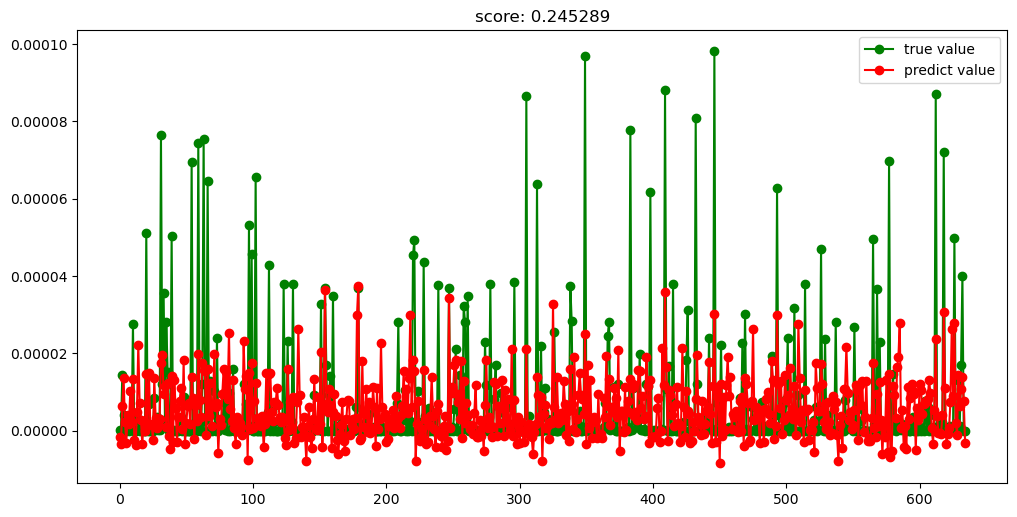

Mean squared error: 0.00
training score: 0.48
testing score: 0.48


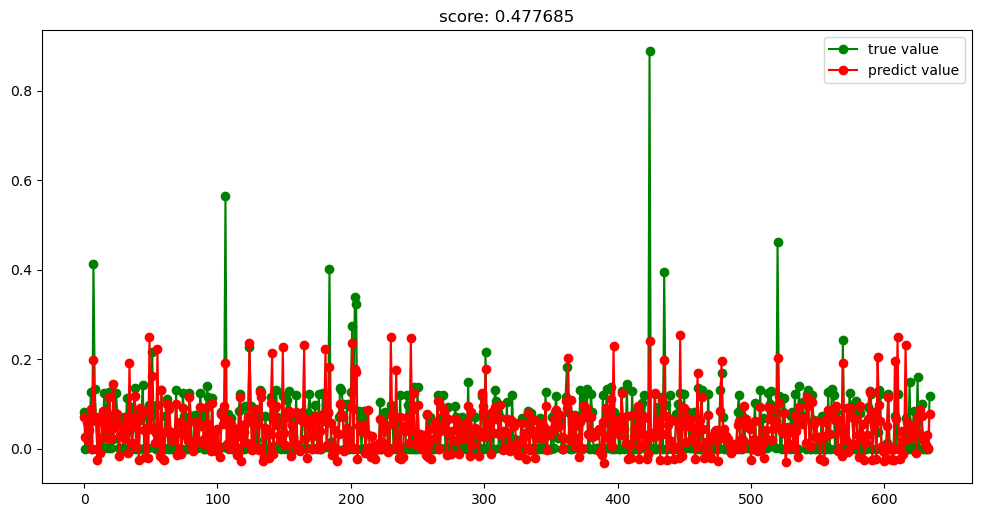

In [21]:
#pf_eff = preprocessing.PolynomialFeatures(degree=2,interaction_only=False,include_bias=True)
pf_e = preprocessing.PolynomialFeatures(degree=3,interaction_only=False,include_bias=True)
pf_t = preprocessing.PolynomialFeatures(degree=3,interaction_only=False,include_bias=True)

lr = linear_model.LinearRegression()
model_e = pl.make_pipeline(pf_e, lr)
model_t = pl.make_pipeline(pf_t,lr)

model_e.fit(X_eff_train, y_e_train)
y_e_model_pred = model_e.predict(X_eff_test)

model_t.fit(X_eff_train,y_t_train)
y_t_model_pred = model_t.predict(X_eff_test)


# The coefficients
#print('Coefficients: \n', model_eff.fit(X_eff_train, y_eff_train).coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_e_test, y_e_model_pred))
# The coefficient of determination: 1 is perfect prediction
print('training score: %.2f'
      % model_e.score(X_eff_train, y_e_train))
print('testing score: %.2f'
      % r2_score(y_e_test, y_e_model_pred))

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(np.arange(len(y_e_test)), y_e_test,'go-',label='true value')
plt.plot(np.arange(len(y_e_test)),y_e_model_pred,'ro-',label='predict value')
plt.title('score: %f'%r2_score(y_e_test, y_e_model_pred))
plt.savefig('poly_error.pdf')
plt.legend()
plt.show()

#print('Coefficients: \n', lr.fit(X_eff_train, y_t_train).coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_t_test, y_t_model_pred))
# The coefficient of determination: 1 is perfect prediction
print('training score: %.2f'
      % model_t.score(X_eff_train, y_t_train))
print('testing score: %.2f'
      % r2_score(y_t_test, y_t_model_pred))

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(np.arange(len(y_t_test)), y_t_test,'go-',label='true value')
plt.plot(np.arange(len(y_t_test)),y_t_model_pred,'ro-',label='predict value')
plt.title('score: %f'%r2_score(y_t_test, y_t_model_pred))
plt.savefig('poly_time.pdf')
plt.legend()
plt.show()

Mean squared error: 0.00
training score: 0.98
testing score: 0.89


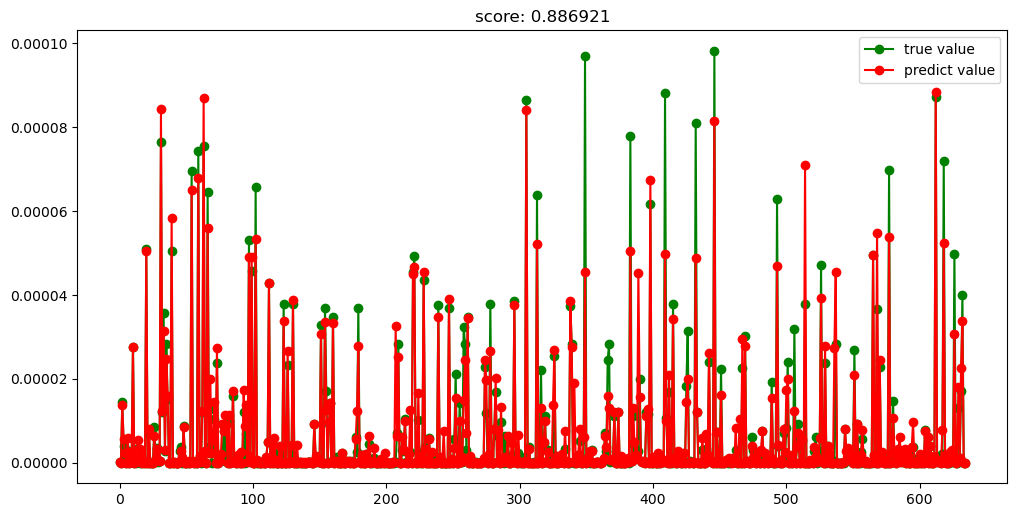

Mean squared error: 0.00
training score: 1.00
testing score: 0.99


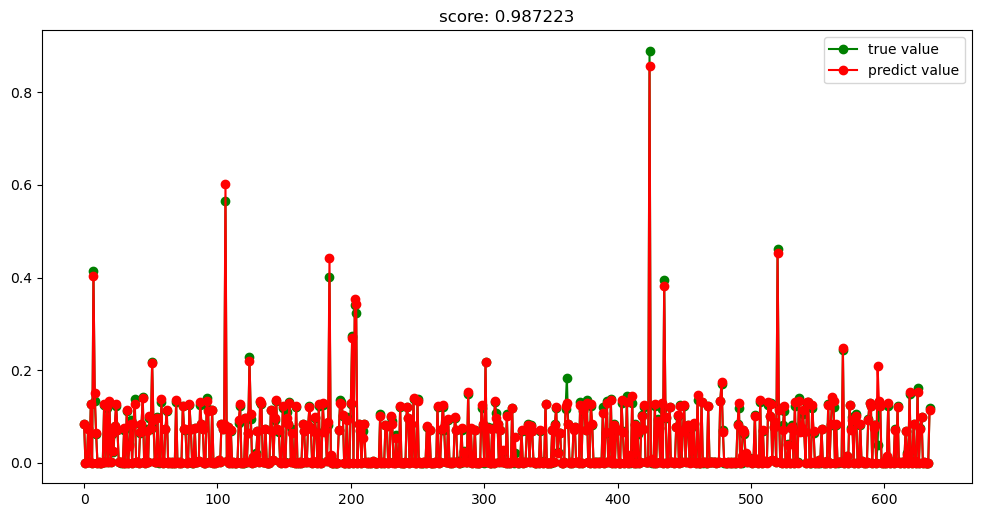

In [22]:
# randomforestregressor
rfr_e = ensemble.RandomForestRegressor(random_state=42)
rfr_t = ensemble.RandomForestRegressor(random_state=42)

rfr_e.fit(X_eff_train, y_e_train)
y_e_rfr_pred = rfr_e.predict(X_eff_test)

rfr_t.fit(X_eff_train, y_t_train)
y_t_rfr_pred = rfr_t.predict(X_eff_test)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_e_test, y_e_rfr_pred))
# The coefficient of determination: 1 is perfect prediction
print('training score: %.2f'
      % rfr_e.score(X_eff_train, y_e_train))
print('testing score: %.2f'
      % r2_score(y_e_test, y_e_rfr_pred))

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(np.arange(len(y_e_test)), y_e_test,'go-',label='true value')
plt.plot(np.arange(len(y_e_test)),y_e_rfr_pred,'ro-',label='predict value')
plt.title('score: %f'%r2_score(y_e_test, y_e_rfr_pred))
plt.savefig('randomforest_errors.pdf')
plt.legend()
plt.show()

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_t_test, y_t_rfr_pred))
# The coefficient of determination: 1 is perfect prediction
print('training score: %.2f'
      % rfr_t.score(X_eff_train, y_t_train))
print('testing score: %.2f'
      % r2_score(y_t_test, y_t_rfr_pred))

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(np.arange(len(y_t_test)), y_t_test,'go-',label='true value')
plt.plot(np.arange(len(y_t_test)),y_t_rfr_pred,'ro-',label='predict value')
plt.title('score: %f'%r2_score(y_t_test, y_t_rfr_pred))
plt.savefig('randomforest_times.pdf')
plt.legend()
plt.show()

In [23]:
def test_estimators(X_train,X_test,y_train,y_test,maxn_estimators):
    estimators=np.arange(1,maxn_estimators)
    training_scores=[]
    testing_scores=[]
    for estimator in estimators:
        model = ensemble.RandomForestRegressor(n_estimators=estimator,random_state=42)
        model.fit(X_train, y_train)
        y_rfr_pred = model.predict(X_test)
        training_scores.append(model.score(X_train,y_train))
        testing_scores.append(r2_score(y_test, y_rfr_pred))
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(estimators,training_scores,label="traing score")
    ax.plot(estimators,testing_scores,label="testing score")
    ax.set_xlabel("maxn_estimators")
    ax.set_ylabel("score")
    ax.set_title('max_scores:%.2f'
                % max(testing_scores))
    ax.legend(framealpha=0.5)
    plt.show()
    best_estimator=1+testing_scores.index(max(testing_scores))
    return best_estimator,max(testing_scores)

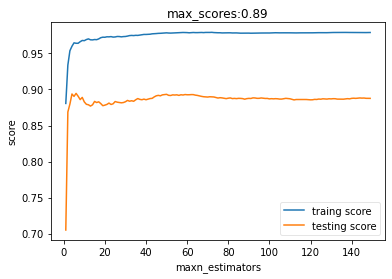

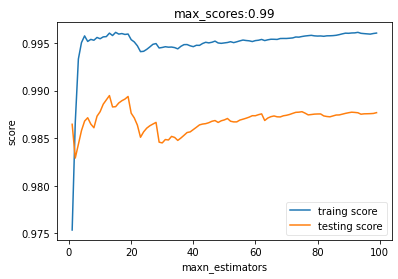

In [24]:
best_estimators_e=test_estimators(X_eff_train,X_eff_test,y_e_train,y_e_test,maxn_estimators=150)
best_estimators_t=test_estimators(X_eff_train,X_eff_test,y_t_train,y_t_test,maxn_estimators=100)

In [25]:
best_estimators_e,best_estimators_t

((6, 0.8945489187158412), (13, 0.9894785071810892))

In [26]:
def test_depth(best_estimators,X_train,X_test,y_train,y_test,mmax_depth):
    depths=np.arange(1,mmax_depth)
    training_scores=[]
    testing_scores=[]
    for depth in depths:
        model = ensemble.RandomForestRegressor(n_estimators=best_estimators[0],
                                               max_depth=depth,random_state=42)
        model.fit(X_train, y_train)
        y_rfr_pred = model.predict(X_test)
        training_scores.append(model.score(X_train,y_train))
        testing_scores.append(r2_score(y_test, y_rfr_pred))
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(depths,training_scores,label="traing score")
    ax.plot(depths,testing_scores,label="testing score")
    ax.set_xlabel("max_depth")
    ax.set_ylabel("score")
    ax.set_title('max_scores:%.2f'
                % max(testing_scores))
    ax.legend(framealpha=0.5)
    plt.show()
    best_depth=1+testing_scores.index(max(testing_scores))
    return best_depth,max(testing_scores)

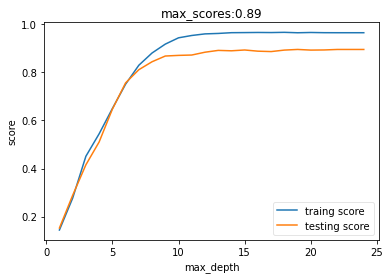

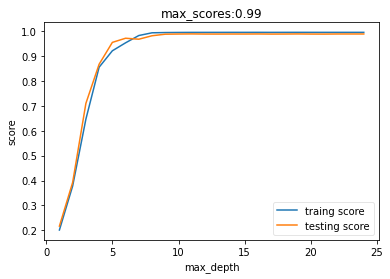

In [27]:
best_depth_e=test_depth(best_estimators_e,X_eff_train,X_eff_test,
                        y_e_train,y_e_test,mmax_depth=25)
best_depth_t=test_depth(best_estimators_t,X_eff_train,X_eff_test,
                        y_t_train,y_t_test,mmax_depth=25)

In [28]:
best_depth_e,best_depth_t

((19, 0.8946103480892846), (11, 0.9897628081144163))

In [29]:
r1=best_depth_e[1]-best_estimators_e[1]
r2=best_depth_t[1]-best_estimators_t[1]
r1,r2

(6.142937344344457e-05, 0.0002843009333270974)

In [30]:
def test_leaf(best_estimators,best_depth,X_train,X_test,y_train,y_test,max_min_leaf):
    
    leaves=np.arange(1,max_min_leaf)
    training_scores=[]
    testing_scores=[]
    for leaf in leaves:
        model = ensemble.RandomForestRegressor(n_estimators=best_estimators[0],
                                               max_depth=best_depth[0],
                                               min_samples_leaf=leaf,
                                               random_state=42)
        model.fit(X_train, y_train)
        y_rfr_pred = model.predict(X_test)
        training_scores.append(model.score(X_train,y_train))
        testing_scores.append(r2_score(y_test, y_rfr_pred))
    # 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(leaves,training_scores,label="traing score")
    ax.plot(leaves,testing_scores,label="testing score")
    ax.set_xlabel("min_samples_leaf")
    ax.set_ylabel("score")
    ax.set_title('max_scores:%.2f'
                % max(testing_scores))
    ax.legend(framealpha=0.5)
    plt.show()
    best_leaf=1+testing_scores.index(max(testing_scores))
    
    return best_leaf,max(testing_scores)

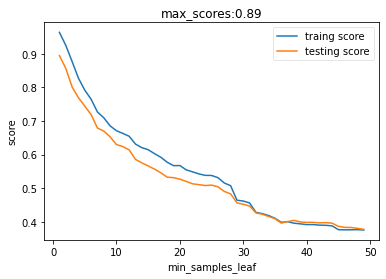

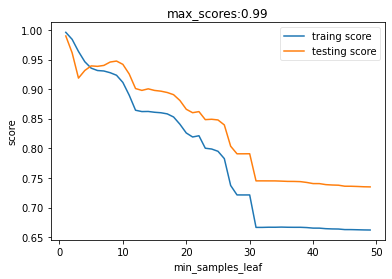

In [31]:
best_leaf_e=test_leaf(best_estimators_e,best_depth_e,X_eff_train,X_eff_test,y_e_train,y_e_test,max_min_leaf=50)
best_leaf_t=test_leaf(best_estimators_t,best_depth_t,X_eff_train,X_eff_test,y_t_train,y_t_test,max_min_leaf=50)

In [32]:
best_leaf_e,best_leaf_t

((1, 0.8946103480892846), (1, 0.9897628081144163))

In [33]:
def test_split(best_estimators,best_depth,X_train,X_test,y_train,y_test,max_min_split):
    
    splits=np.arange(2,max_min_split)
    training_scores=[]
    testing_scores=[]
    for split in splits:
        model = ensemble.RandomForestRegressor(n_estimators=best_estimators[0],
                                               max_depth=best_depth[0],
                                               min_samples_leaf=1,
                                               min_samples_split=split,
                                               random_state=42)
        model.fit(X_train, y_train)
        y_rfr_pred = model.predict(X_test)
        training_scores.append(model.score(X_train,y_train))
        testing_scores.append(r2_score(y_test, y_rfr_pred))
    # 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(splits,training_scores,label="traing score")
    ax.plot(splits,testing_scores,label="testing score")
    ax.set_xlabel("min_samples_split")
    ax.set_ylabel("score")
    ax.set_title('max_scores:%.2f'
                % max(testing_scores))
    ax.legend(framealpha=0.5)
    plt.show()
    best_split=2+testing_scores.index(max(testing_scores))
    
    return best_split,max(testing_scores)

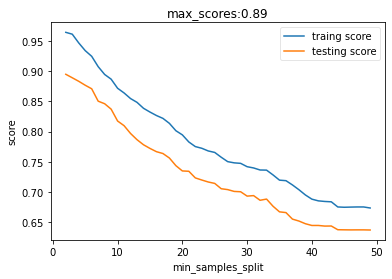

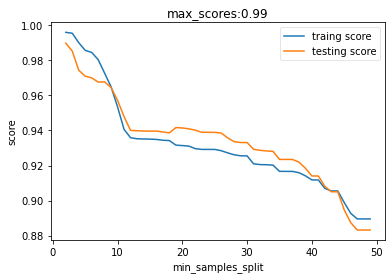

In [34]:
best_split_e=test_split(best_estimators_e,best_depth_e,X_eff_train,X_eff_test,y_e_train,y_e_test,max_min_split=50)
best_split_t=test_split(best_estimators_t,best_depth_t,X_eff_train,X_eff_test,y_t_train,y_t_test,max_min_split=50)

In [35]:
best_split_e,best_split_t

((2, 0.8946103480892846), (2, 0.9897628081144163))

Mean squared error: 0.00
training score: 0.96
testing score: 0.89


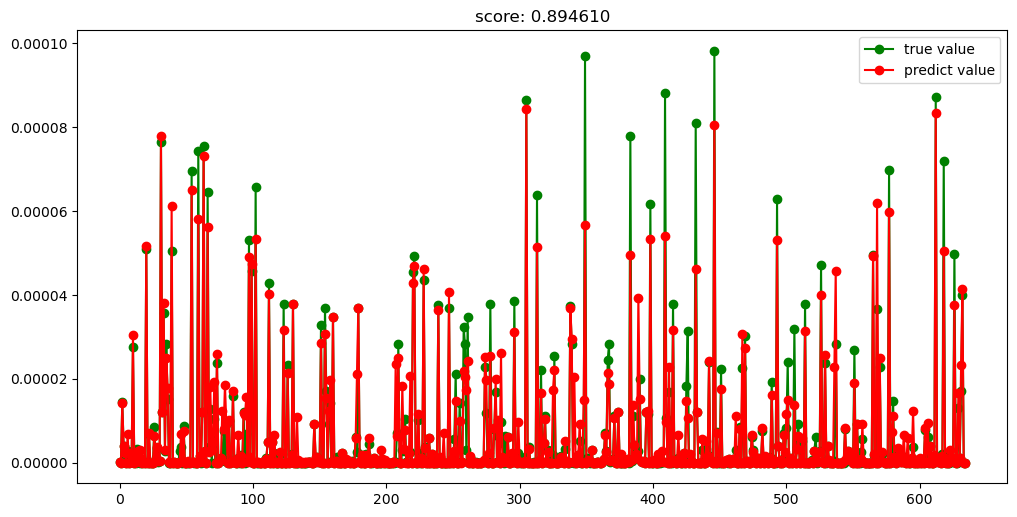

Mean squared error: 0.00
training score: 1.00
Coefficient of determination: 0.99


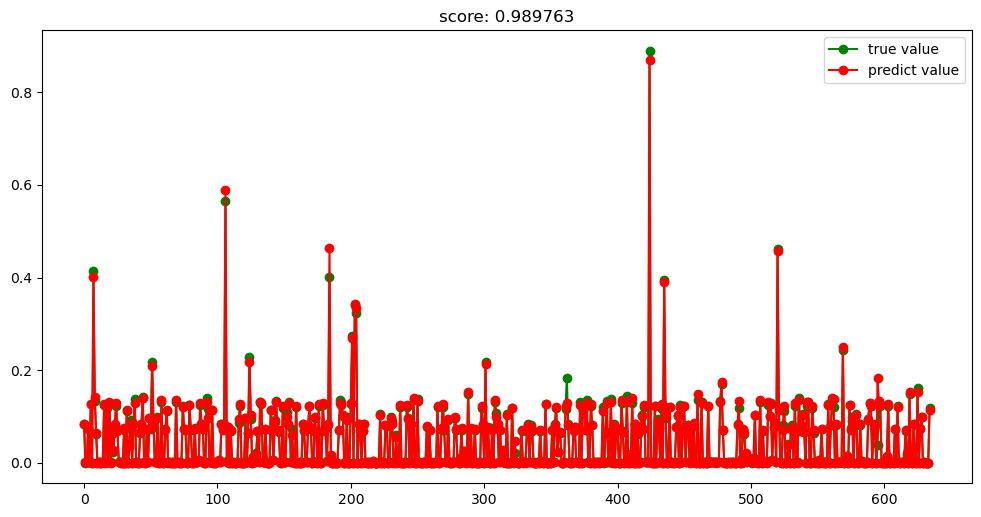

In [36]:
# randomforestregressor
rfr_new_e = ensemble.RandomForestRegressor(n_estimators=best_estimators_e[0],
                                       max_depth=best_depth_e[0],
                                       min_samples_leaf=1,
                                       min_samples_split=2,random_state=42)
rfr_new_t = ensemble.RandomForestRegressor(n_estimators=best_estimators_t[0],
                                       max_depth=best_depth_t[0],
                                       min_samples_leaf=1,
                                       min_samples_split=2,random_state=42)

rfr_new_e.fit(X_eff_train, y_e_train)
y_e_rfr_pred = rfr_new_e.predict(X_eff_test)

rfr_new_t.fit(X_eff_train, y_t_train)
y_t_rfr_pred = rfr_new_t.predict(X_eff_test)


# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_e_test, y_e_rfr_pred))
# The coefficient of determination: 1 is perfect prediction
print('training score: %.2f'
      % rfr_new_e.score(X_eff_train, y_e_train))
print('testing score: %.2f'
      % r2_score(y_e_test, y_e_rfr_pred))

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(np.arange(len(y_e_test)), y_e_test,'go-',label='true value')
plt.plot(np.arange(len(y_e_test)),y_e_rfr_pred,'ro-',label='predict value')
plt.title('score: %f'%r2_score(y_e_test, y_e_rfr_pred))
plt.legend()
plt.savefig('randforest_new_error.pdf')
plt.show()

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_t_test, y_t_rfr_pred))
# The coefficient of determination: 1 is perfect prediction
print('training score: %.2f'
      % rfr_new_t.score(X_eff_train, y_t_train))
print('Coefficient of determination: %.2f'
      % r2_score(y_t_test, y_t_rfr_pred))

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(np.arange(len(y_t_test)), y_t_test,'go-',label='true value')
plt.plot(np.arange(len(y_t_test)),y_t_rfr_pred,'ro-',label='predict value')
plt.title('score: %f'%r2_score(y_t_test, y_t_rfr_pred))
plt.legend()
plt.savefig('randforest_new_time.pdf')
plt.show()

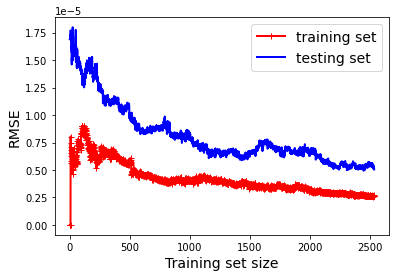

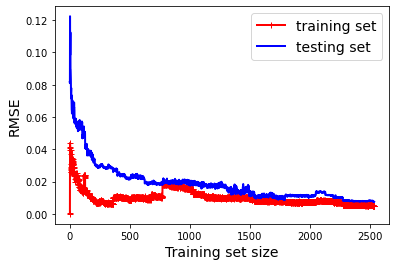

In [37]:
plot_learning_curves(rfr_new_e,X_eff_train,X_eff_test,y_e_train,y_e_test)
plot_learning_curves(rfr_new_t,X_eff_train,X_eff_test,y_t_train,y_t_test)

In [38]:
nonstiffness_0=[1.4,1.1,0.9,0.6,0.3]
tols=[1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]
X_=[]
for i in range(len(solver_1)):
    for j in range(len(solver_2)):
        for n in range(len(nonstiffness_0)):
            for m in range(len(tols)):
                x0=[]
                x0.append(solver_1[i])
                x0.append(solver_2[j])
                x0.append(nonstiffness_0[n])
                x0.append(tols[m])
                X_.append(x0)

In [39]:
enc_=[]
para=[]
for i in range(len(X_)):
    enc_.append([solver_1.index(X_[i][0]),solver_2.index(X_[i][1])])
    para.append([X_[i][2],X_[i][3]])
encoded_solver_v0=encoder_solver.transform(enc_).toarray() 
para=np.array(para)
enc_=np.array(enc_)
X_0=np.c_[enc_,para]

In [40]:
X_

[['AutoTsit5', 'KenCarp3', 1.4, 0.1],
 ['AutoTsit5', 'KenCarp3', 1.4, 0.01],
 ['AutoTsit5', 'KenCarp3', 1.4, 0.001],
 ['AutoTsit5', 'KenCarp3', 1.4, 0.0001],
 ['AutoTsit5', 'KenCarp3', 1.4, 1e-05],
 ['AutoTsit5', 'KenCarp3', 1.4, 1e-06],
 ['AutoTsit5', 'KenCarp3', 1.1, 0.1],
 ['AutoTsit5', 'KenCarp3', 1.1, 0.01],
 ['AutoTsit5', 'KenCarp3', 1.1, 0.001],
 ['AutoTsit5', 'KenCarp3', 1.1, 0.0001],
 ['AutoTsit5', 'KenCarp3', 1.1, 1e-05],
 ['AutoTsit5', 'KenCarp3', 1.1, 1e-06],
 ['AutoTsit5', 'KenCarp3', 0.9, 0.1],
 ['AutoTsit5', 'KenCarp3', 0.9, 0.01],
 ['AutoTsit5', 'KenCarp3', 0.9, 0.001],
 ['AutoTsit5', 'KenCarp3', 0.9, 0.0001],
 ['AutoTsit5', 'KenCarp3', 0.9, 1e-05],
 ['AutoTsit5', 'KenCarp3', 0.9, 1e-06],
 ['AutoTsit5', 'KenCarp3', 0.6, 0.1],
 ['AutoTsit5', 'KenCarp3', 0.6, 0.01],
 ['AutoTsit5', 'KenCarp3', 0.6, 0.001],
 ['AutoTsit5', 'KenCarp3', 0.6, 0.0001],
 ['AutoTsit5', 'KenCarp3', 0.6, 1e-05],
 ['AutoTsit5', 'KenCarp3', 0.6, 1e-06],
 ['AutoTsit5', 'KenCarp3', 0.3, 0.1],
 ['AutoTsi

In [41]:
def the_best_solver(k1,k2,k3,time_limit,reg_error,reg_time,x):
    
    k1_list = [k1]*len(X_)
    k2_list = [k2]*len(X_)
    k3_list = [k3]*len(X_)
    k1 = np.array(k1_list)
    k2 = np.array(k2_list)
    k3 = np.array(k3_list)
    X = np.c_[k1,k2,k3,encoded_solver_v0,para]
    errors_pred = reg_error.predict(X)
    times_pred = reg_time.predict(X)
    x = x[times_pred < time_limit]
    errors_pred = errors_pred[times_pred < time_limit]
    times_pred = times_pred[times_pred < time_limit]
    fit_error = min(errors_pred)
    site = np.where(errors_pred==fit_error)
    time =[]
    for i in range(len(site[0])):
        fit_time=times_pred[site[0][i]]
        time.append(fit_time)
    min_time=min(time)
    site_1 = np.where(time==min_time)
    site_2 = site[0][site_1]
    bsolver = x[site_2]
    return fit_error,min_time,solver_1[int(bsolver[0][0])],solver_2[int(bsolver[0][1])],bsolver[0][2],bsolver[0][3]

In [42]:
fit_error,time,solver1,solver2,nonstiffness,retols = the_best_solver(1e-2,2e6,3e8,0.05,rfr_new_e,rfr_new_t,X_0)

In [43]:
fit_error,time,solver1,solver2,nonstiffness,retols

(3.5824088863891147e-11,
 0.0018850119743589746,
 'AutoVern7',
 'Rodas5',
 1.1,
 1e-06)